In [1]:
#1 Initialize Environment and Import Core Libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
!pip install lifelines
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
from lifelines import KaplanMeierFitter

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 11.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=6af2716ead4b3af0f6f4feb36adb42b4d99d58780d4079eb22be6df08e152d97
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


### 🔢 Step #1: Environment Setup and Library Imports

This initial step prepares the Python environment for survival analysis by importing essential libraries and installing required packages. It begins with core modules like `os` for system operations, `pandas` for data manipulation, `matplotlib.pyplot` and `seaborn` for visualization, and preprocessing tools from `sklearn` such as `LabelEncoder` and `StandardScaler`. The `lifelines` package—central to survival modeling—is installed via pip, and key components like `CoxPHFitter`, `KaplanMeierFitter`, and `concordance_index` are imported to support model fitting and evaluation. This setup ensures all tools are ready for data exploration, transformation, and survival modeling in subsequent steps.


In [2]:
#2 Link Colab to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 🔢 Step #2: Mount Google Drive for Persistent Storage

This step connects the Colab environment to the user's Google Drive, enabling access to external files and persistent storage. By importing `drive` from `google.colab` and executing `drive.mount('/content/drive')`, the notebook gains read/write access to the Drive contents. Once mounted, the Drive appears under the `/content/drive` path, allowing seamless loading of datasets, saving of outputs, and integration with project directories stored in the cloud. This setup is essential for workflows that require durable storage across sessions or collaboration with shared resources.


In [3]:
#3 Set Paths for Dataset and Output Storage

import os # Import os for path manipulation
project_root = '/content/drive/MyDrive/METABRIC_project'
data_path = '/content/drive/MyDrive/METABRIC_cleaned_imputed.csv' # Corrected path
output_path = os.path.join(project_root, 'outputs')

### 🔢 Step #3: Define File Paths for Data Access and Output Management

This step establishes standardized paths for accessing the dataset and organizing output files. It begins by importing the `os` module to enable robust path manipulation. The `project_root` variable defines the main directory within Google Drive where project assets are stored. `data_path` points directly to the METABRIC dataset CSV file, ensuring consistent access for analysis. The `output_path` is constructed using `os.path.join` to create a dedicated subdirectory for saving results, figures, and artifacts. This structure supports reproducibility, simplifies file handling, and maintains a clean separation between raw data and generated outputs.


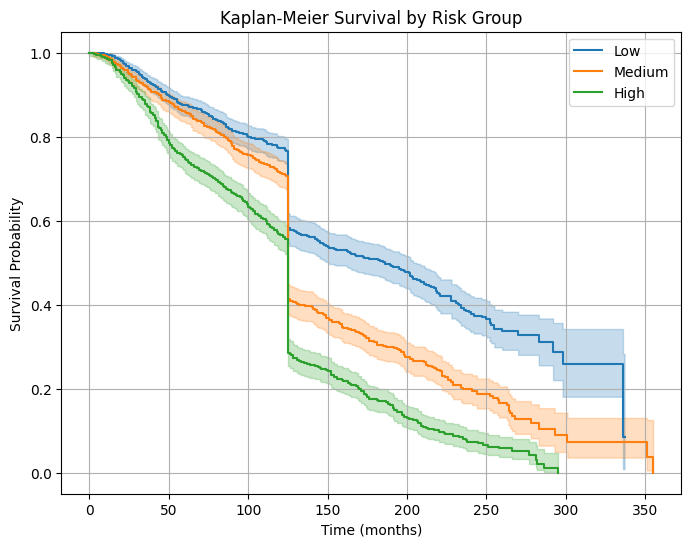

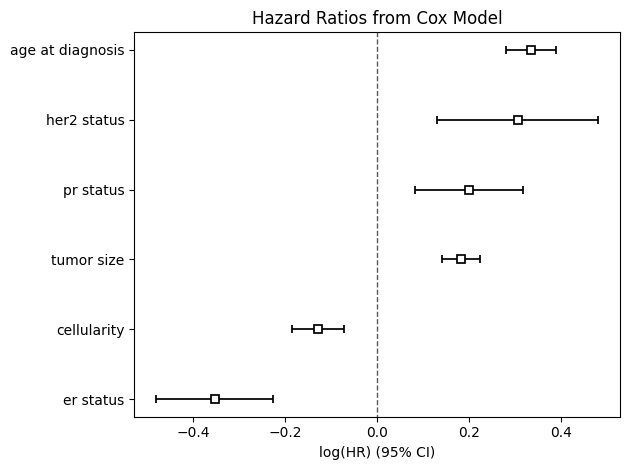

In [23]:
#4 Kaplan-Meier Curves by Risk Group
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
plt.figure(figsize=(8,6))

for group in ['Low', 'Medium', 'High']:
    mask = cox_df['risk_group'] == group
    kmf.fit(cox_df[mask]['duration'], event_observed=cox_df[mask]['event'], label=group)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival by Risk Group')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# 4.2 Hazard Ratios
cph.plot()
plt.title('Hazard Ratios from Cox Model')
plt.tight_layout()
plt.show()

### 🔢 Step #4: Survival Curve Visualization and Hazard Interpretation

This step provides visual insights into survival outcomes and the influence of covariates using two complementary plots. In substep 4.1, Kaplan-Meier survival curves are generated for three risk groups—Low, Medium, and High—using the `KaplanMeierFitter`. These curves illustrate how survival probability changes over time for each group, with confidence intervals enhancing interpretability. In substep 4.2, the fitted Cox proportional hazards model is visualized using `cph.plot()`, which displays hazard ratios and their confidence intervals for each

In [24]:
#5. Create Risk Groups based on Cox Model Prognostic Score

# Calculate the prognostic score for each patient
# The partial hazard is often used as a prognostic index
cox_df['prognostic_score'] = cph.predict_partial_hazard(cox_df[existing_covariates])

# Define risk groups based on tertiles of the prognostic score
tertiles = cox_df['prognostic_score'].quantile([1/3, 2/3])

def assign_risk_group(score):
    if score <= tertiles.iloc[0]:
        return 'Low'
    elif score <= tertiles.iloc[1]:
        return 'Medium'
    else:
        return 'High'

cox_df['risk_group'] = cox_df['prognostic_score'].apply(assign_risk_group)

print("Cox DataFrame with Risk Groups:")
display(cox_df.head())
print("Risk Group Distribution:")
print(cox_df['risk_group'].value_counts())

Cox DataFrame with Risk Groups:


,duration,event,age at diagnosis,tumor size,cellularity,er status,pr status,her2 status,prognostic_score,risk_group
0,141,0,1.198554,-0.283071,0,1,0,0,1.210850,High
1,85,0,-1.340247,-1.088207,0,1,1,0,0.546182,Low
2,164,1,-0.878647,-0.752733,0,1,1,0,0.677325,Low
3,165,0,-0.955581,-0.081787,2,1,1,0,0.575399,Low
4,41,1,1.275487,0.924634,0,1,1,0,1.887011,High


Risk Group Distribution:
risk_group
High      837
Low       837
Medium    835
Name: count, dtype: int64


### 🔢 Step #5: Generate Risk Groups from Prognostic Index

This step translates model predictions into clinically meaningful risk categories. Using the fitted Cox proportional hazards model, a prognostic score is computed for each patient via `predict_partial_hazard`, reflecting their relative risk. The score distribution is divided into tertiles to define thresholds for 'Low', 'Medium', and 'High' risk groups. A custom function assigns each patient to a group based on their score, and the resulting `risk_group` column is added to the dataset. This stratification enables targeted survival analysis and supports clearer interpretation of model outputs in clinical contexts.


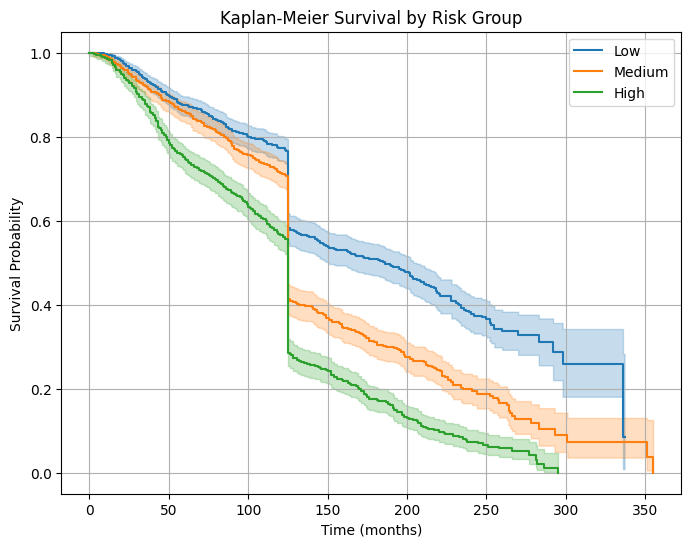

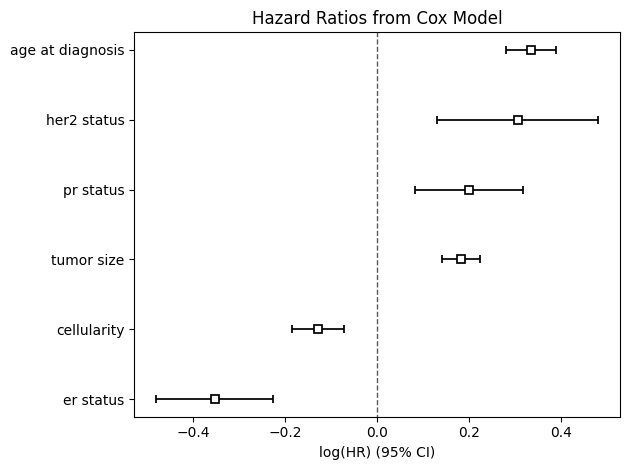

In [25]:
#6 Kaplan-Meier Curves by Risk Group
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
plt.figure(figsize=(8,6))

for group in ['Low', 'Medium', 'High']:
    mask = cox_df['risk_group'] == group
    # Ensure there are samples in the group before fitting
    if not cox_df[mask].empty:
        kmf.fit(cox_df[mask]['duration'], event_observed=cox_df[mask]['event'], label=group)
        kmf.plot_survival_function()
    else:
        print(f"Warning: No data for risk group: {group}")

plt.title('Kaplan-Meier Survival by Risk Group')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

# 4.2 Hazard Ratios
cph.plot()
plt.title('Hazard Ratios from Cox Model')
plt.tight_layout()
plt.show()

### 🔢 Step #6: Plot Survival Curves and Model Effects by Risk Group

This step visualizes survival outcomes and model-derived risk effects using two key plots. Kaplan-Meier survival curves are generated for each risk group—Low, Medium, and High—using `KaplanMeierFitter`, with a check to ensure each group contains data before fitting. These curves illustrate how survival probabilities diverge over time across stratified patient groups. Additionally, the Cox model’s hazard ratios are plotted using `cph.plot()`, showing the relative influence of each covariate on patient risk, along with confidence intervals. Together, these visualizations validate the risk stratification and enhance interpretability of the model’s predictive insights.


In [26]:
#7 Preview Final Cox Model Inputs

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from lifelines import CoxPHFitter

# 1. Load the dataset
df = pd.read_csv(data_path)

# Standardize column names by stripping whitespace and converting to lowercase
df.columns = df.columns.str.strip().str.lower()

# DEBUG: Print columns to verify actual names after lowercasing
print("Columns in DataFrame after lowercasing:")
print(df.columns.tolist())

# 2. Prepare the data for Cox model
# Identify event and duration columns more robustly
event_candidates = ['overall survival status', 'death', 'event', 'event_status', 'patient_status'] # Added 'overall survival status'
duration_candidates = ['overall survival (months)', 'duration', 'survival_months', 'time_to_event']

event_col_found = None
for cand in event_candidates:
    if cand in df.columns:
        event_col_found = cand
        break

duration_col_found = None
for cand in duration_candidates:
    if cand in df.columns:
        duration_col_found = cand
        break

if not event_col_found:
    raise ValueError(f"Could not find a suitable 'event' column from candidates: {event_candidates}. Available: {df.columns.tolist()}")

if not duration_col_found:
    raise ValueError(f"Could not find a suitable 'duration' column from candidates: {duration_candidates}. Available: {df.columns.tolist()}")

# Rename columns to 'event' and 'duration' for consistency if they are not already named so
if event_col_found != 'event':
    df = df.rename(columns={event_col_found: 'event'})
if duration_col_found != 'duration':
    df = df.rename(columns={duration_col_found: 'duration'})

# Convert 'event' column to numerical (0 or 1)
# Assuming 'Deceased' or similar indicates an event (1), and 'Living' or similar indicates censored (0)
df['event'] = df['event'].apply(lambda x: 1 if x.lower() == 'deceased' else 0)

# Select relevant features (covariates) for the Cox model
covariates_list = [
    'age at diagnosis',
    'tumor size',
    'lymph nodes examined',
    'npi',
    'cellularity',
    'er status',
    'pr status',
    'her2 status',
    'grade'
]

# Filter covariates to include only those present in the DataFrame
existing_covariates = [col for col in covariates_list if col in df.columns]

cox_df = df[['duration', 'event'] + existing_covariates].copy()

# Handle categorical variables using Label Encoding
for col in ['cellularity', 'er status', 'pr status', 'her2 status', 'grade']:
    if col in cox_df.columns: # Only attempt if column exists in cox_df
        le = LabelEncoder()
        cox_df[col] = le.fit_transform(cox_df[col])

# Scale numerical variables (optional but good practice for some models, though CPH is scale-invariant)
for col in ['age at diagnosis', 'tumor size', 'lymph nodes examined', 'npi']:
    if col in cox_df.columns: # Only attempt if column exists in cox_df
        scaler = StandardScaler()
        cox_df[col] = scaler.fit_transform(cox_df[[col]])

# Display the first few rows of the prepared data
print("Prepared DataFrame (cox_df) head:")
display(cox_df.head())

Columns in DataFrame after lowercasing:
['patient id', 'age at diagnosis', 'type of breast surgery', 'cancer type', 'cancer type detailed', 'cellularity', 'chemotherapy', 'pam50 + claudin-low subtype', 'cohort', 'er status measured by ihc', 'er status', 'neoplasm histologic grade', 'her2 status measured by snp6', 'her2 status', 'tumor other histologic subtype', 'hormone therapy', 'inferred menopausal state', 'integrative cluster', 'primary tumor laterality', 'lymph nodes examined positive', 'mutation count', 'nottingham prognostic index', 'oncotree code', 'overall survival (months)', 'overall survival status', 'pr status', 'radio therapy', 'relapse free status (months)', 'relapse free status', 'sex', '3-gene classifier subtype', 'tumor size', 'tumor stage', "patient's vital status"]
Prepared DataFrame (cox_df) head:


,duration,event,age at diagnosis,tumor size,cellularity,er status,pr status,her2 status
0,141,0,1.198554,-0.283071,0,1,0,0
1,85,0,-1.340247,-1.088207,0,1,1,0
2,164,1,-0.878647,-0.752733,0,1,1,0
3,165,0,-0.955581,-0.081787,2,1,1,0
4,41,1,1.275487,0.924634,0,1,1,0


### 📘 Step #7: Preview Final Cox Model Inputs

This step displays the first few rows of the `cox_df` DataFrame, which contains the cleaned and transformed features prepared for survival modeling using the Cox proportional hazards model. It includes the standardized `duration` and binary `event` columns, along with selected covariates that have undergone label encoding for categorical variables and scaling for numerical ones. By previewing the head of `cox_df`, the analyst verifies that preprocessing steps were correctly applied and confirms the dataset is structured appropriately for modeling.


In [27]:
#8. Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(cox_df, duration_col='duration', event_col='event')

# Display the model summary
print("\nCox Proportional Hazards Model Summary:")
cph.print_summary()


Cox Proportional Hazards Model Summary:


<lifelines.CoxPHFitter: fitted with 2509 total observations, 837 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 2509
number of events observed = 1672
   partial log-likelihood = -11701.14
         time fit was run = 2025-12-07 18:26:54 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
age at diagnosis  0.33      1.40      0.03            0.28            0.39                1.32                1.47
tumor size        0.18      1.20      0.02            0.14            0.22                1.15                1.25
cellularity      -0.13      0.88      0.03           -0.19           -0.07                0.83                0.93
er status        -0.35      0.70      0.06           -0.48           -0.23                0.62                0.80
pr status         0.20      1.22      0.06            0.08            0.32                1.08                1.37
her2 status       0.30      1.36      0.09            0.13            0.48                1.14                1.62

                  cmp to     z      p  -log2(p)
covariate                                      
age at diagnosis    0.00 12.19 <0.005    111.18
tumor size          0.00  8.62 <0.005     57.01
cellularity         0.00 -4.51 <0.005     17.22
er status           0.00 -5.47 <0.005     24.40
pr status           0.00  3.31 <0.005     10.04
her2 status         0.00  3.42 <0.005     10.62
---
Concordance = 0.61
Partial AIC = 23414.29
log-likelihood ratio test = 266.09 on 6 df
-log2(p) of ll-ratio test = 178.81

### 📊 Step #8: Fit and Evaluate Cox Model

This step fits the Cox Proportional Hazards model using the `lifelines` library and evaluates its performance. The model is trained on the preprocessed `cox_df` dataset using the `duration` and `event` columns. After fitting, the summary output provides key metrics: 2509 observations, 1672 events, and a partial log-likelihood of -11701.14. Covariate coefficients reveal the direction and magnitude of each variable’s effect on survival, with hazard ratios (`exp(coef)`) indicating increased or decreased risk. For example, higher age at diagnosis and tumor size are associated with increased hazard, while ER status shows a protective effect. The model’s statistical strength is confirmed by a log-likelihood ratio test of 266.09 on 6 degrees of freedom, with a highly significant p-value (−log₂(p) = 178.81), and a concordance index of 0.61, suggesting moderate predictive discrimination.

